In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 10)
%config InlineBackend.figure_format = 'retina'

from numpy.matlib import repmat
from sklearn.preprocessing import normalize

In [2]:
spotify_dataset = pd.read_csv('genres_v2.csv')

/var/folders/_0/541h7pgs06l9wr3xp3jssnsc0000gn/T/ipykernel_19051/575343321.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify_dataset = pd.read_csv('genres_v2.csv')


In [3]:
spotify_dataset.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [4]:
spotify_dataset.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
5,0.721,0.568,0,-11.295,1,0.4140,0.0452,0.212000,0.1280,0.1090,...,6fsypiJHyWmeINsOLC1cos,spotify:track:6fsypiJHyWmeINsOLC1cos,https://api.spotify.com/v1/tracks/6fsypiJHyWme...,https://api.spotify.com/v1/audio-analysis/6fsy...,112511,4,Dark Trap,Gatteka,NaN,NaN
6,0.718,0.668,8,-4.162,1,0.1370,0.0254,0.007800,0.1240,0.0380,...,0XfQbq7DaMOmVXgQ71eA6E,spotify:track:0XfQbq7DaMOmVXgQ71eA6E,https://api.spotify.com/v1/tracks/0XfQbq7DaMOm...,https://api.spotify.com/v1/audio-analysis/0XfQ...,77584,4,Dark Trap,kamikaze (+ pulse),NaN,NaN
7,0.694,0.711,8,-5.525,1,0.2210,0.0397,0.000000,0.1120,0.2830,...,0LLeuNBWPOg3XA73yab3PT,spotify:track:0LLeuNBWPOg3XA73yab3PT,https://api.spotify.com/v1/tracks/0LLeuNBWPOg3...,https://api.spotify.com/v1/audio-analysis/0LLe...,127524,3,Dark Trap,T.R.U. (Totally Rotten Underground),NaN,NaN
8,0.774,0.751,1,-2.445,1,0.1980,0.0614,0.000000,0.0728,0.1890,...,37gqBnUAZe8BY8WR56kDNk,spotify:track:37gqBnUAZe8BY8WR56kDNk,https://api.spotify.com/v1/tracks/37gqBnUAZe8B...,https://api.spotify.com/v1/audio-analysis/37gq...,140326,4,Dark Trap,I Put My Dick in Your Mental,NaN,NaN
9,0.893,0.907,11,-10.406,1,0.3670,0.1520,0.031100,0.5580,0.3020,...,2ggqfj97qyiORmXoVFzP5j,spotify:track:2ggqfj97qyiORmXoVFzP5j,https://api.spotify.com/v1/tracks/2ggqfj97qyiO...,https://api.spotify.com/v1/audio-analysis/2ggq...,121979,4,Dark Trap,Andromeda,NaN,NaN


In [5]:
spotify_dataset.title.isna().value_counts()

True     21525
False    20780
Name: title, dtype: int64

In [6]:
spotify_dataset.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [7]:
columns_cluster = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

**PCA**
* Using PCA to reduce dimension 

In [8]:
# Getting columns that we want to find cluster
clusters_df = spotify_dataset[columns_cluster]

In [9]:
# Using np.stack to put into matrix form
A = np.stack(clusters_df.values)
(m, n) = A.shape
print("Cluster matrix shape:", (m, n))

Cluster matrix shape: (42305, 11)


In [10]:
# Calculate the mean by each column
mean = np.mean(clusters_df)
mean_matrix = np.stack(mean.values)
mean_matrix = mean_matrix.reshape((mean.shape[0], 1))

# Print to check
print(mean_matrix)
print("Shape:", mean_matrix.shape)

[[ 6.39364321e-01]
 [ 7.62515591e-01]
 [ 5.37023992e+00]
 [-6.46544210e+00]
 [ 5.49462239e-01]
 [ 1.36560548e-01]
 [ 9.61604757e-02]
 [ 2.83047542e-01]
 [ 2.14079232e-01]
 [ 3.57100957e-01]
 [ 1.47474056e+02]]
Shape: (11, 1)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [11]:
def eigsort(evector, evals):
    
    # Sort the eigenvalues from largest to smallest
    lambd = np.sort(evals)[::-1]
    index = np.argsort(evals)[::-1]
    
    # Getting sorted eigenvalues matrix
    D_sort = np.diag(lambd)
    
    m = np.size(lambd)
    V_sort = np.zeros((m, m))
    
    # Getting sorted eigenvectors matrix
    for i in range(m):
        V_sort[:,i] = evector[:,index[i]]
        
    # Return sorted (eigenvalues, eigenvectors); be consistent with the np.linalg.eig()
    return D_sort, V_sort

In [12]:
def PCA_largeDim(df, mean):
    # Zero-mean the data
    Z = A - repmat(mean, m, 1)

    # Should have 11 eigenvalues
    # And 11 eigenvectors correspond to those
    evals, evector = np.linalg.eig(Z.T.dot(Z))

    # Sort eigenvectors by eigenvalues descending order
    Dsort, Vsort = eigsort(evector, evals) 

    # Compute Eigenvectors of AA.T then normalize using L2 norm (euclidean distance)
    V = A.dot(Vsort)
    V = normalize(V, norm='l2', axis=0)  #l2 norm == euclidean distance

    # Compute Principal Components
    C = V.T.dot(Z)

    # Reconstruct zero-meaned matrix then the pattern
    X_hat = V.dot(C) + repmat(mean, m, 1)

    # Return sorted eigenvectors, principal components, and reconstructed pattern
    return V, C, X_hat



In [13]:
V, C, X_hat = PCA_largeDim(A, mean)

# Print to check
print("Eigenvector Shape:", V.shape)
print("Principal Component Shape:", C.shape)
print("Reconstructed Pattern Shape:", X_hat.shape)

Eigenvector Shape: (42305, 11)
Principal Component Shape: (11, 11)
Reconstructed Pattern Shape: (42305, 11)


In [14]:
print("Original data points")
clusters_df.head(10)

Original data points


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988
5,0.721,0.568,0,-11.295,1,0.4140,0.0452,0.212000,0.1280,0.1090,144.915
6,0.718,0.668,8,-4.162,1,0.1370,0.0254,0.007800,0.1240,0.0380,130.826
7,0.694,0.711,8,-5.525,1,0.2210,0.0397,0.000000,0.1120,0.2830,138.049
8,0.774,0.751,1,-2.445,1,0.1980,0.0614,0.000000,0.0728,0.1890,219.960
9,0.893,0.907,11,-10.406,1,0.3670,0.1520,0.031100,0.5580,0.3020,199.942


In [15]:
print("New data points")
new_cluster_PCA = pd.DataFrame(X_hat)
new_cluster_PCA.columns = columns_cluster
new_cluster_PCA.head(10)

New data points


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.748739,0.794862,6.047091,-7.338480,0.835079,0.218386,-0.041101,0.378645,0.225834,0.369527,151.497781
1,0.725268,0.739834,7.789195,-7.285531,0.827079,0.182660,0.078434,0.366408,0.252772,0.362604,150.428991
2,0.779333,0.780010,6.950131,-7.184153,0.834904,0.183631,-0.065755,0.456174,0.282929,0.311671,153.057276
3,0.676505,0.819758,5.467183,-7.129465,0.837264,0.156935,-0.030012,0.414437,0.219360,0.351796,152.259615
4,0.735713,0.769338,6.043721,-7.354312,0.835248,0.201607,0.025942,0.362899,0.250007,0.400798,151.268052
5,0.749165,0.780913,5.463061,-7.677590,0.833186,0.215091,-0.041118,0.415955,0.241697,0.330535,151.193348
6,0.754580,0.772964,7.789375,-7.026011,0.828125,0.187783,-0.025880,0.387394,0.242776,0.332828,150.827850
7,0.730513,0.790325,7.796013,-7.160519,0.829730,0.189980,-0.022497,0.375210,0.232438,0.367291,151.014147
8,0.768137,0.778112,5.770993,-6.963851,0.839028,0.189065,-0.034320,0.443894,0.240266,0.326664,153.101271
9,0.771526,0.780642,8.716986,-7.689478,0.830436,0.225093,-0.033084,0.429872,0.312705,0.356143,152.604021


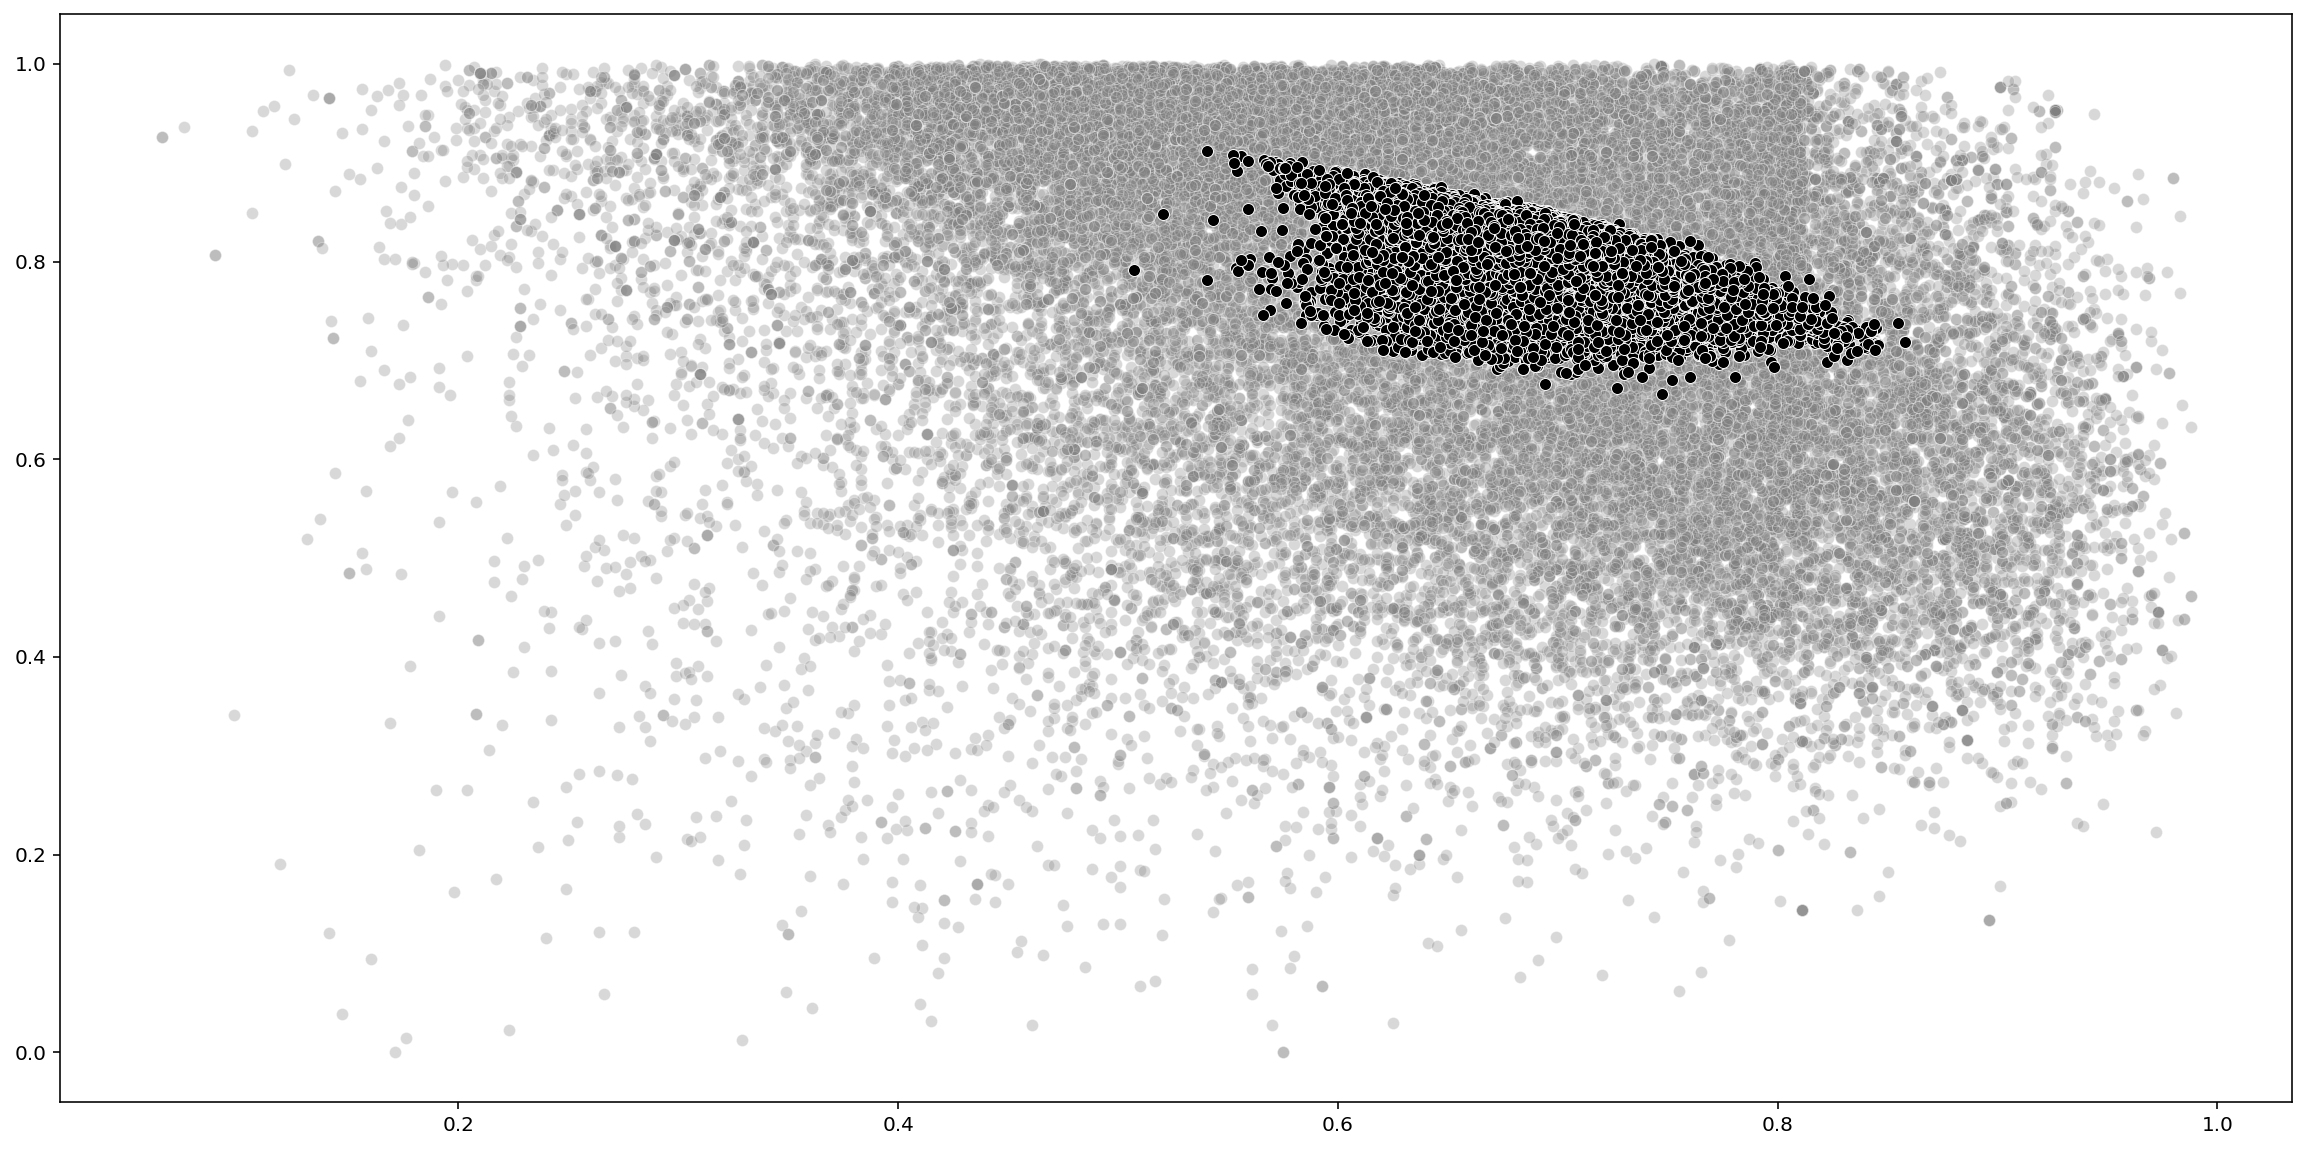

In [16]:
# Testing
ax = sns.scatterplot(x=A[:,0], y=A[:,1], color='grey', alpha=0.3) # Original data points
ax = sns.scatterplot(x=X_hat[:,0], y=X_hat[:,1], color='black')   # New data points

Correlation Heatmap with Original Data


<AxesSubplot:>

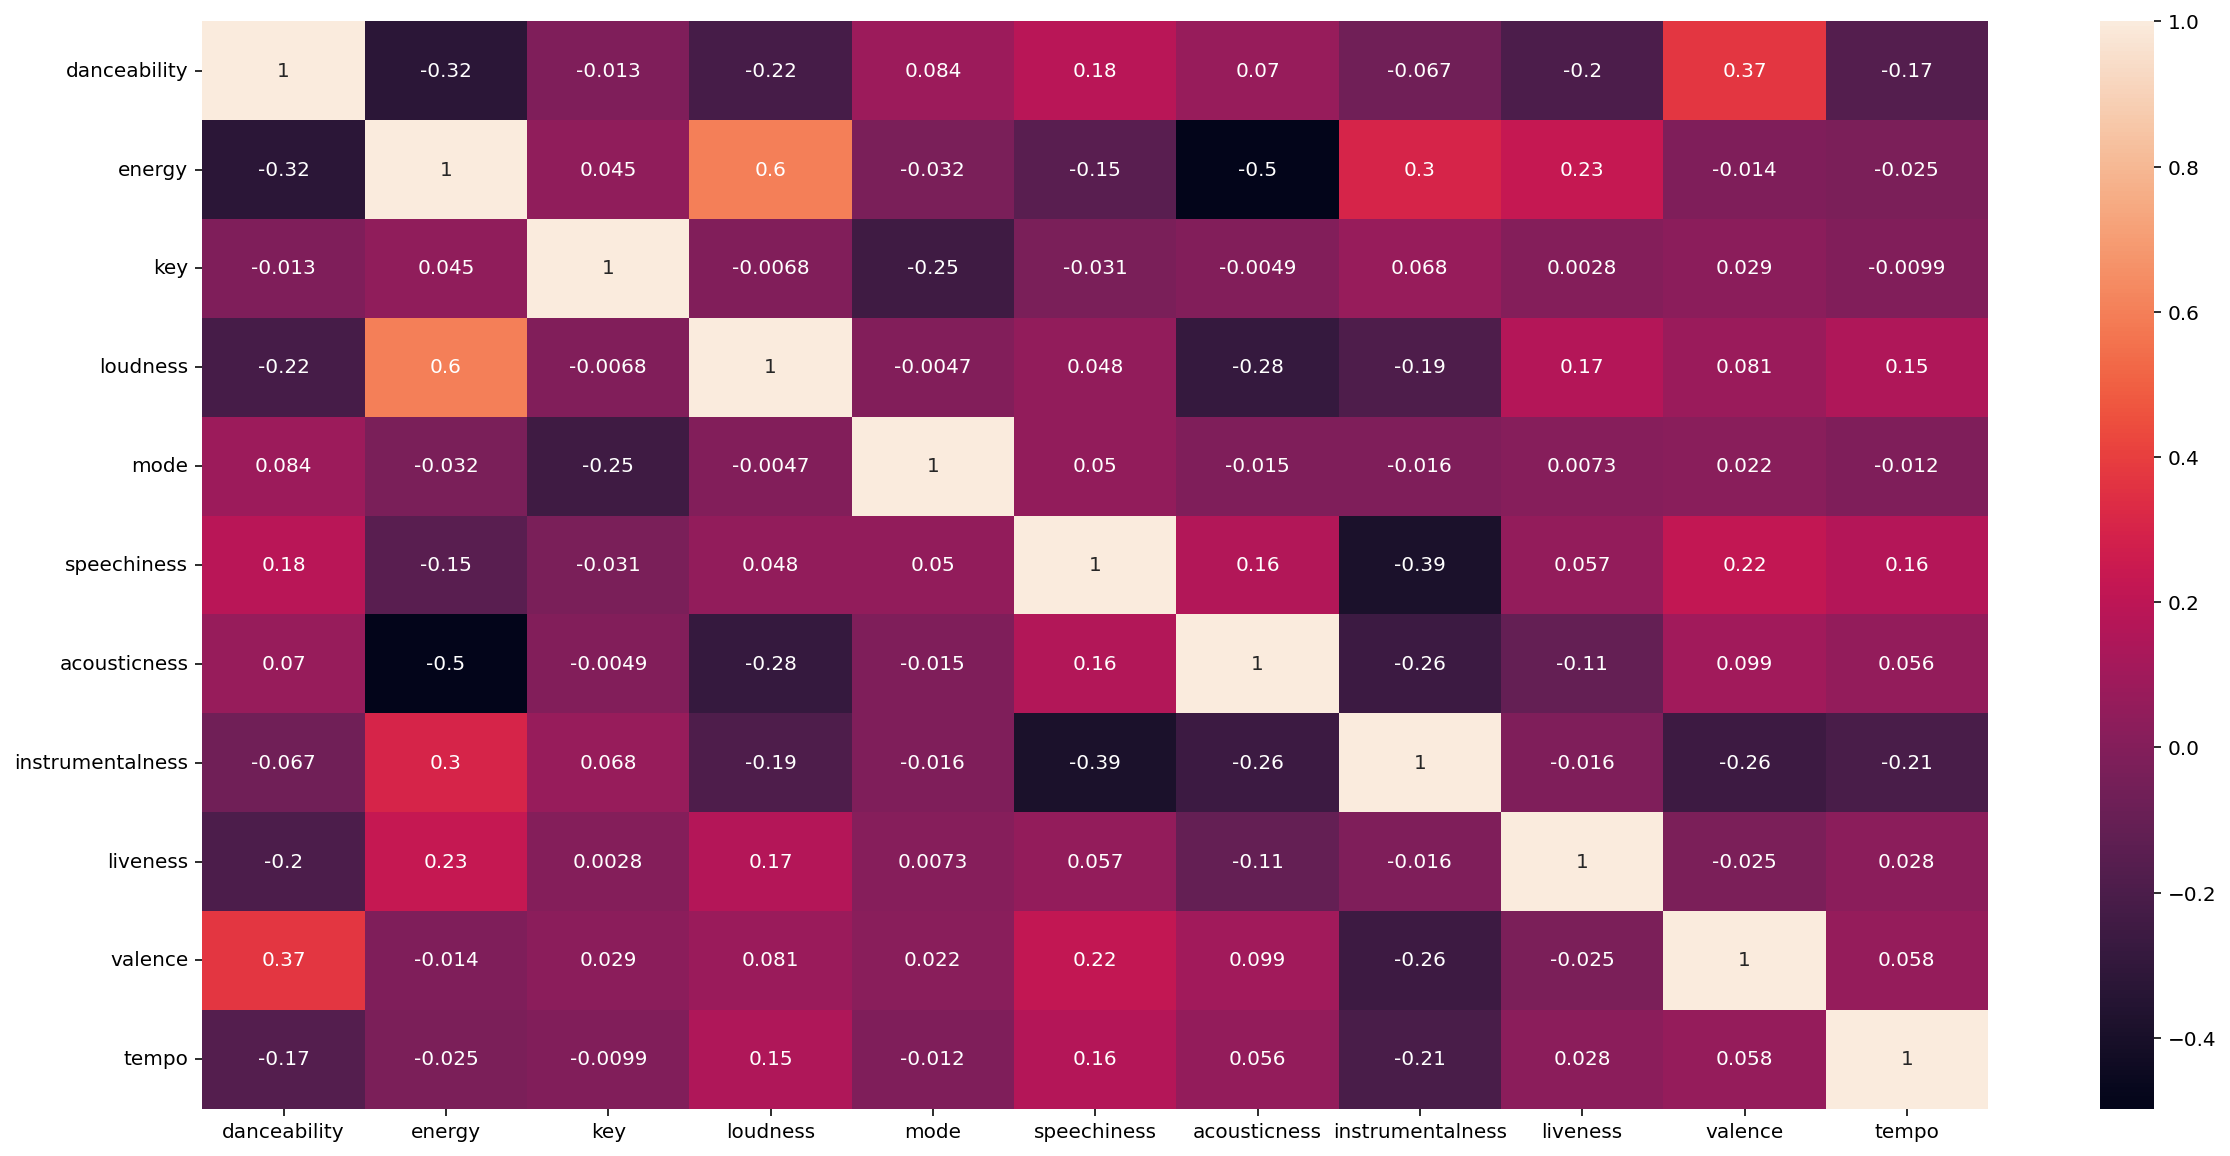

In [17]:
print("Correlation Heatmap with Original Data")
sns.heatmap(clusters_df.corr(), annot=True)

Correlation HeatMap after PCA


<AxesSubplot:>

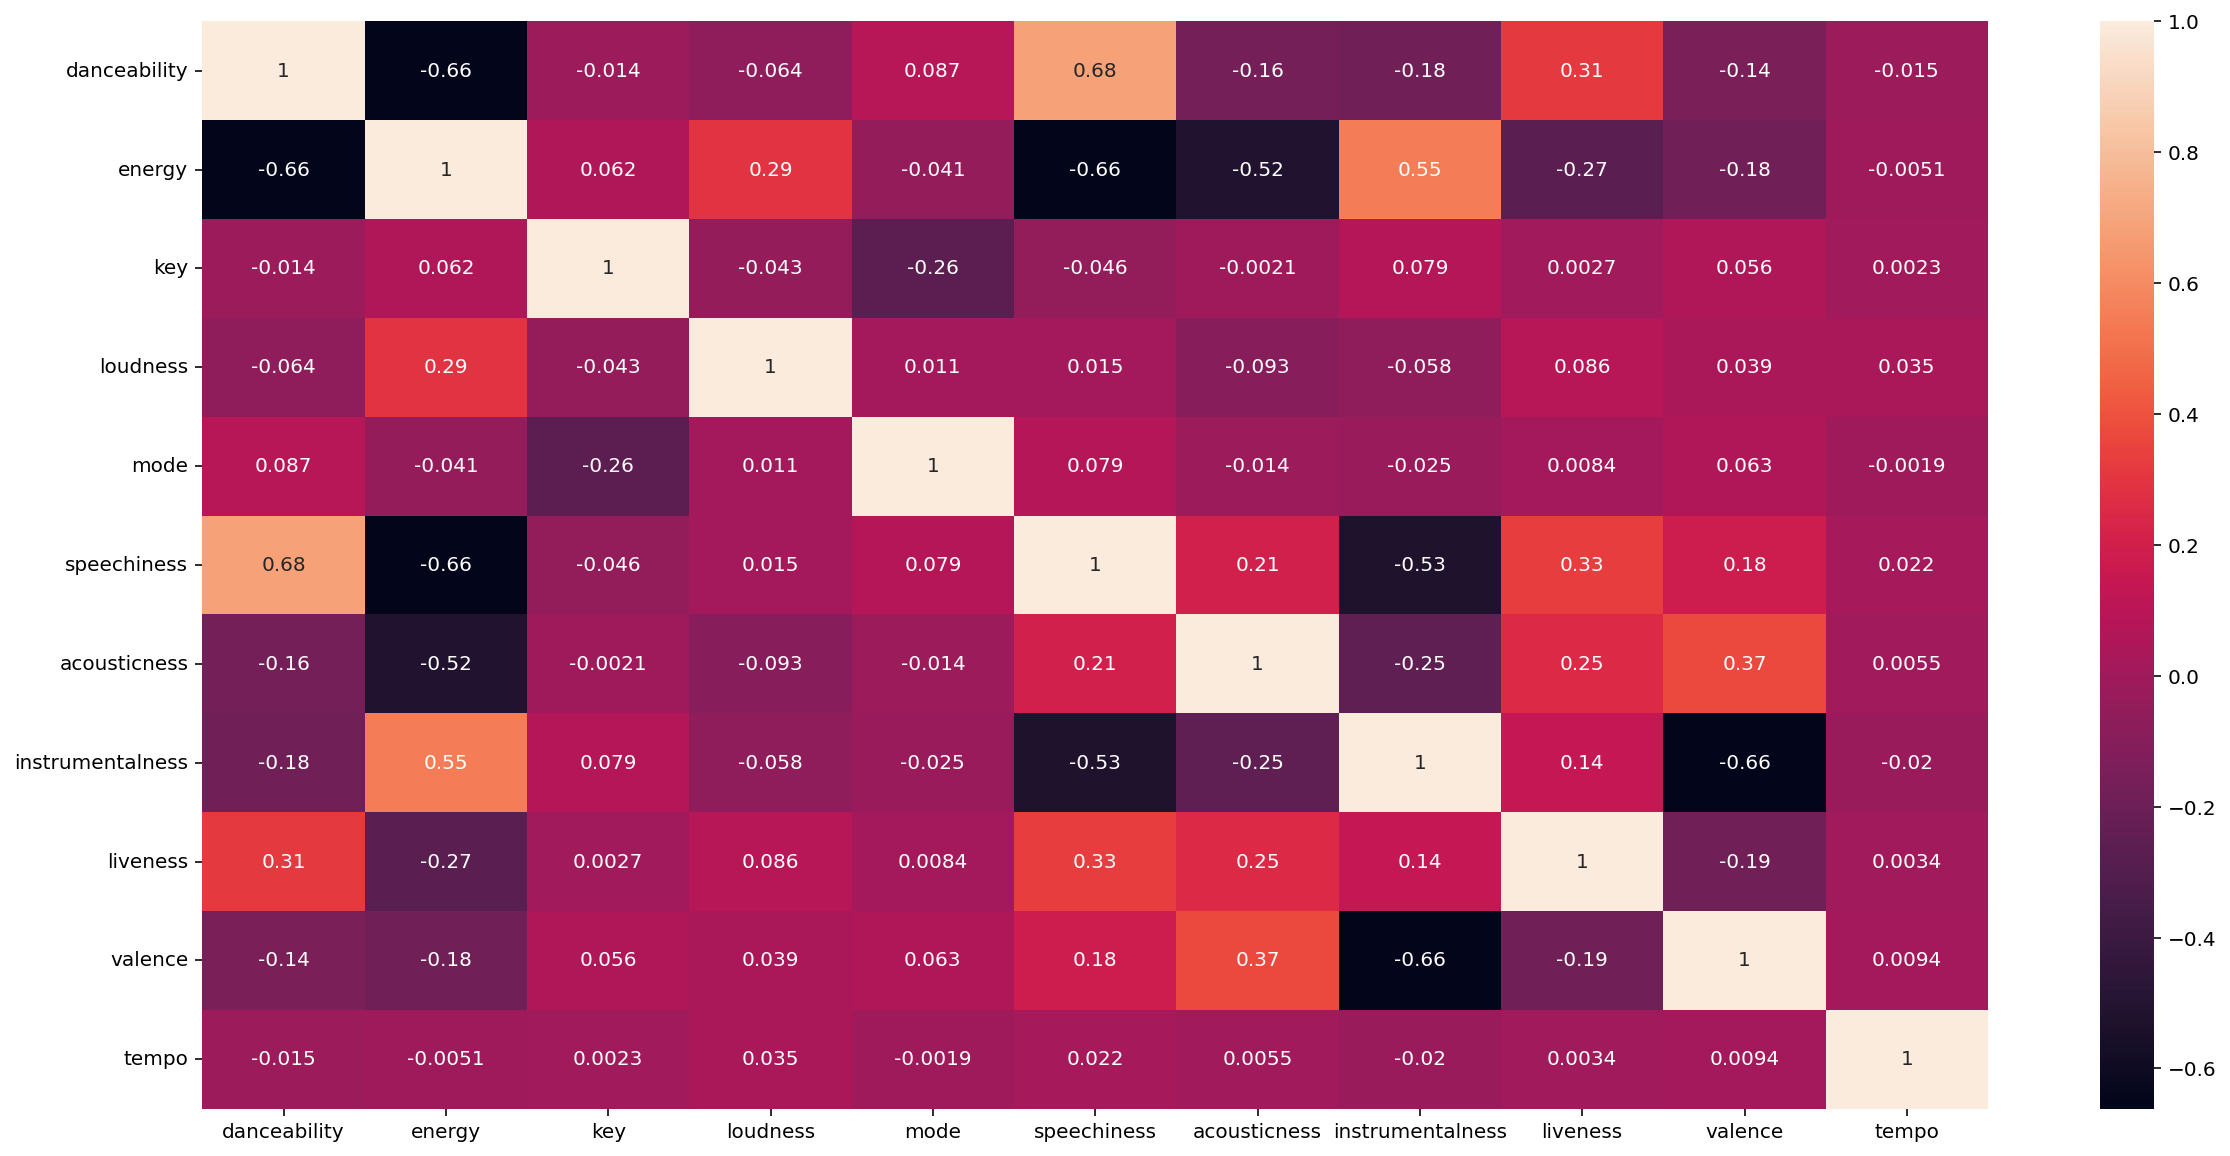

In [18]:
print("Correlation HeatMap after PCA")
sns.heatmap(new_cluster_PCA.corr(), annot=True)

Looking at Histogram of the Original Data


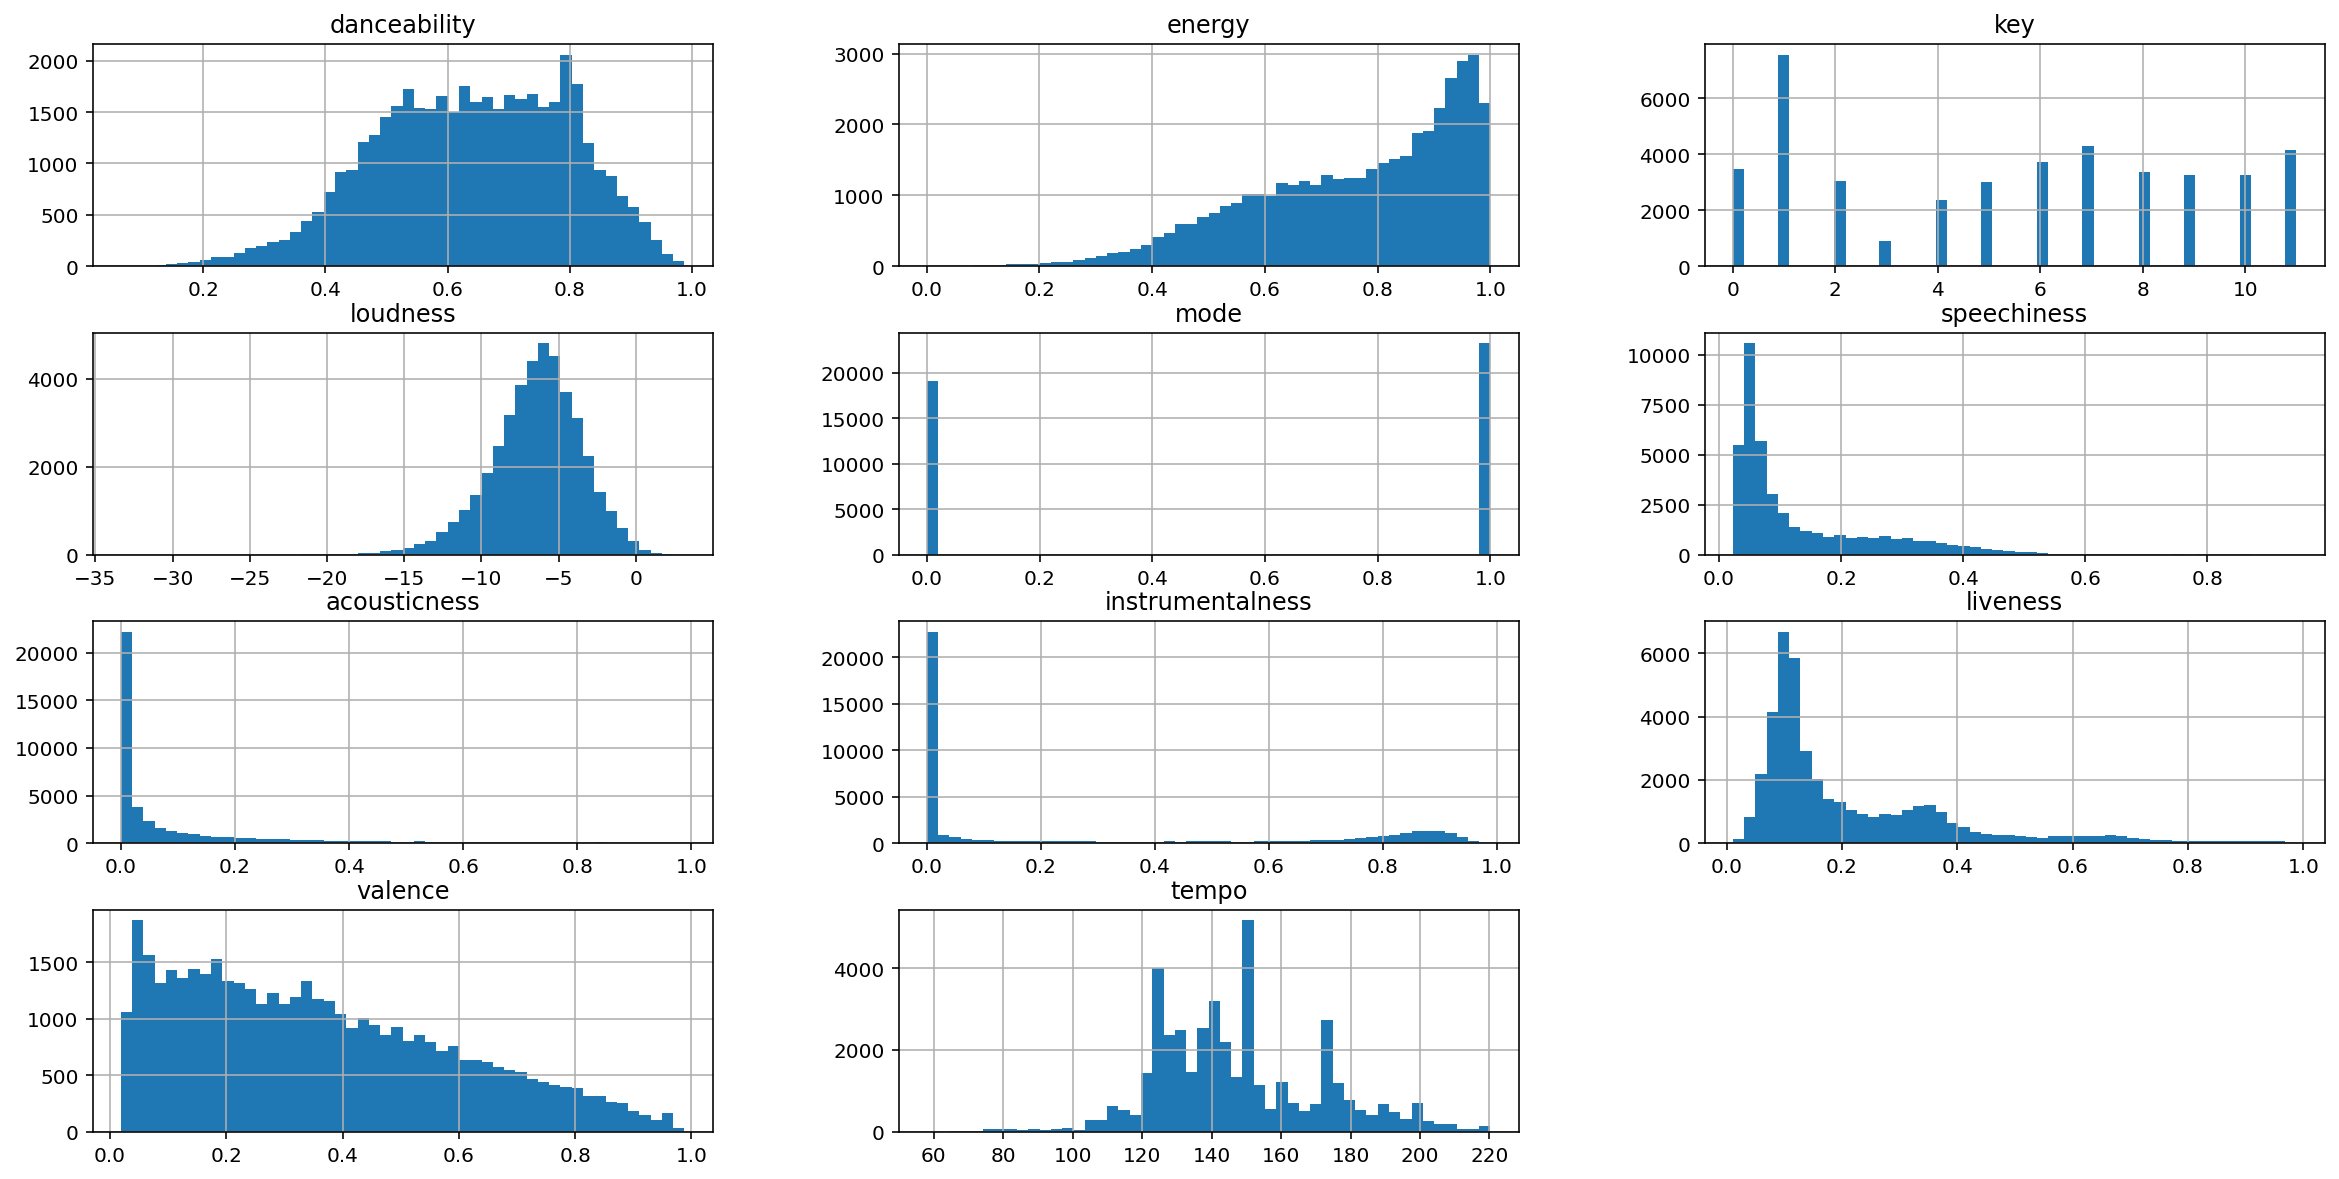

In [19]:
print("Looking at Histogram of the Original Data")
clusters_df.hist(bins=50, figsize=(20,10))
plt.show()

Looking at Histogram after running PCA


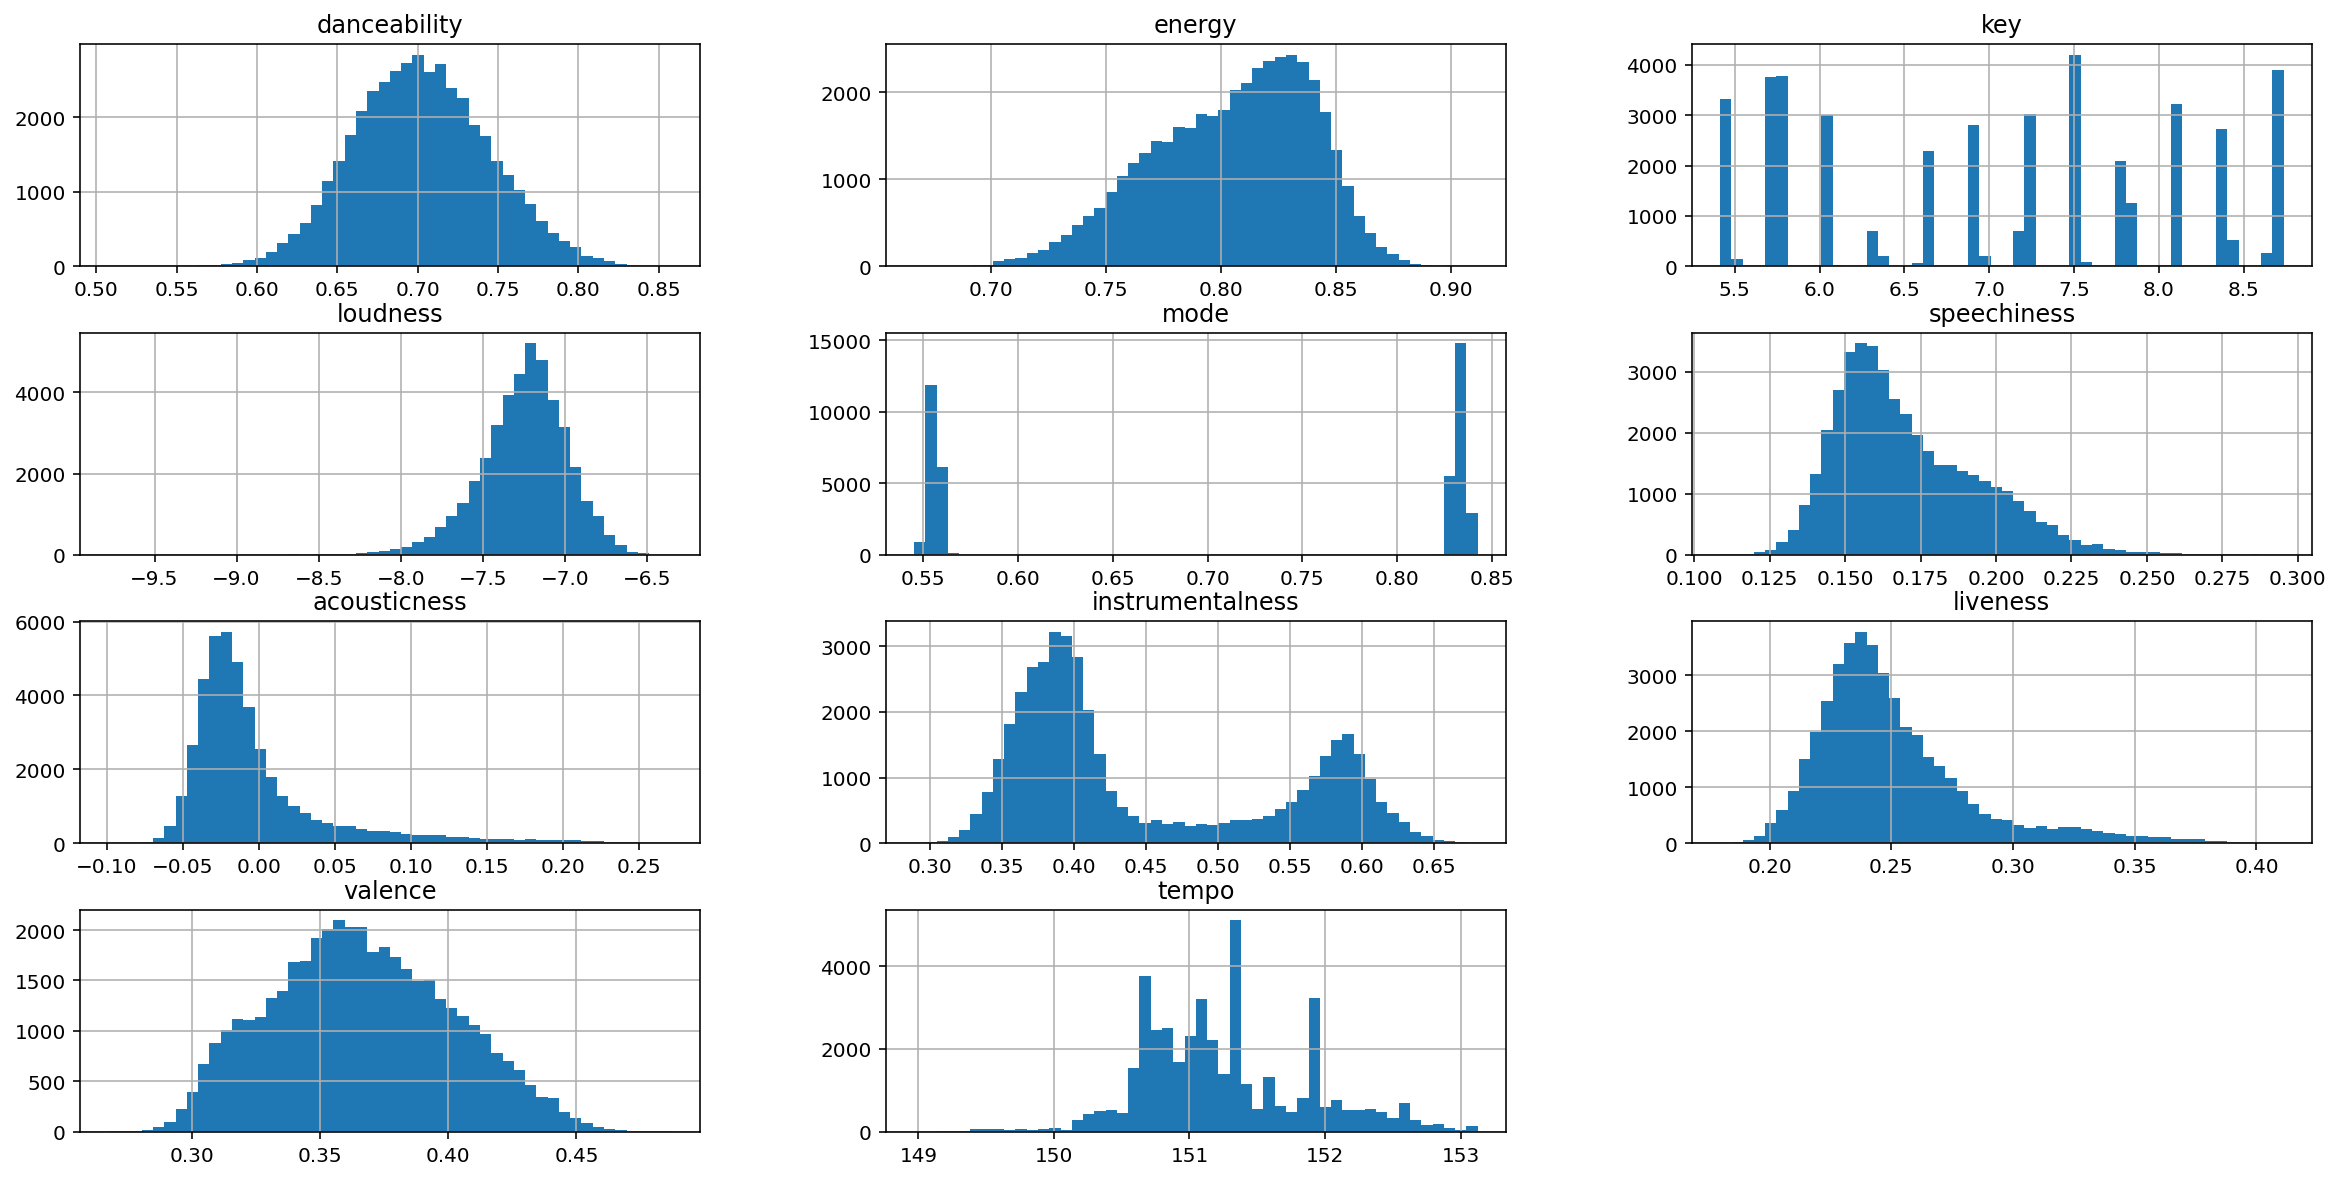

In [20]:
print("Looking at Histogram after running PCA")
new_cluster_PCA.hist(bins=50, figsize=(20,10))
plt.show()